# **CUSTOMER LIFETIME VALUE**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

### **1.1 Background**
<br>
Nilai seumur hidup pelanggan (customer lifetime value atau CLV) merupakan ukuran seberapa berharganya seorang pelanggan bagi perusahaan. Dari nilai ini, perusahaan dapat menentukan berapa besar laba yang diperoleh dari satu penumpang dan biaya yang dikeluarkan untuk memperoleh atau mempertahankan pelanggan baru. Angka ini cukup penting bagi perusahaan untuk mengetahui apakah perusahaan ingin menargetkan pemasaran kepada pelanggan yang berharga secara efektif dan bagaimana pelanggan perusahaan akan berubah di masa mendatang.


Pada kasus perusahaan asuransi, mengetahui besarnya CLV dapat membantu beberapa kinerja perusahaan, diantaranya :
* Marketing bisa menggunakan informasi CLV untuk menentukan mana customer yang kemungkinan jarang melakukan klaim dan membayar premi yang tinggi. Marketing dapat memilih customer yang menghasilkan keuntungan besar untuk perusahaan.
* Customer service bisa menentukan bagaimana metode yang tepat digunakan untuk tiap jenis customernya, sehingga tidak ada biaya yang tinggi digunakan kepada customer yang memiliki nilai CLV yang rendah,
* Bagian finance dan risk management dapat menghitung bagaimana seorang customer dapat memberikan keuntungan dan langkah yang perlu dilakukan ketika customer pergi.

## **1.2 Problem Statement**

Menghitung Customer Lifetime Value (CLV) dalam industri asuransi biasanya dilakukan dengan menganalisis riwayat pelanggan, termasuk premi yang dibayarkan, klaim yang diajukan, dan biaya operasional yang dikeluarkan perusahaan selama periode hubungan pelanggan dengan perusahaan. Namun, metode ini memerlukan waktu yang panjang karena bergantung pada data historis yang lengkap, sehingga sering kali hasilnya datang terlambat. Sebagai contoh, pada saat hasil perhitungan siap, perusahaan mungkin sudah kehilangan kesempatan untuk menawarkan perpanjangan polis atau menerapkan strategi pemasaran yang efektif.

Untuk mengatasi hal ini, diperlukan metode yang mampu memperkirakan CLV di masa depan. Dengan menggunakan model prediksi, perusahaan dapat menentukan lebih awal pelanggan mana yang cenderung memiliki nilai seumur hidup yang tinggi dan mana yang tidak. Informasi ini memungkinkan perusahaan untuk fokus pada kegiatan pemasaran yang lebih tepat sasaran, mengarahkan sumber daya pada pelanggan yang bernilai tinggi. Dengan demikian, perusahaan dapat meningkatkan efisiensi dan efektivitas operasionalnya, mengurangi pengeluaran untuk pemasaran pada pelanggan yang kurang potensial.

Namun, manfaat prediksi CLV hanya akan optimal jika model prediksinya akurat. Oleh karena itu, membangun model yang mampu memprediksi CLV dengan baik sangat penting agar strategi bisnis yang diambil dapat memberikan dampak positif dan meningkatkan profitabilitas perusahaan.

## **1.3 Goals**

Pemodelan regresi digunakan untuk memprediksi Customer Lifetime Value (CLV) berdasarkan variabel-variabel pelanggan asuransi. Dengan bantuan machine learning, model prediktif ini akan dibangun untuk memperkirakan CLV secara akurat. Dalam Capstone Project Modul 3, tujuan utamanya adalah mengembangkan model yang mampu mengestimasi CLV bagi pelanggan perusahaan asuransi, guna mendukung strategi bisnis yang lebih efektif dan efisien.

## **1.4 Analytic Approach**

1. Data Understanding (Pemahaman Data)
2. Explantory Data Analysis (EDA)
3. Feature Engineering (Rekayasa Fitur) jika dibutuhkan
4. Data Preprocessing (Pra-pemrosesan Data)
5. Modeling (Pemodelan)
6. Melakukan Hyperparameter Tuning pada model terpilih untuk mendapatkan hasil error yang lebih rendah.

## **1.5 Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## **2. Data**

### **2.1 Data Understanding**

In [201]:
# import library

import pandas as pd             # untuk olah dataset
import numpy as np              # --------//--------
import matplotlib.pyplot as plt # Visualisasi
import seaborn as sns           # ------//----------

import warnings
warnings.filterwarnings('ignore')

In [202]:
# Load dataset Customer Lifetime Value
df_clv = pd.read_csv(r"C:\Users\angga\Downloads\Customer Lifetime Value-20240917T080218Z-001\Customer Lifetime Value\data_customer_lifetime_value.csv")
df_clv.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [203]:
df_clv.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

In [204]:
df_clv.rename(columns={'EmploymentStatus': 'Employment Status'}, inplace=True)
df_clv.head()

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [205]:
df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   Employment Status        5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


|**Features**| **Data Type** | **Deskripsi**|
| ----- | ----- | ----- |
| Vehicle Class | Object | Tipe kendaraan customer |
|Coverage | Object | Tipe proteksi yang diberikan pada kendaraan |
|Renew Offer type | Object | Tipe penawaran pembaharuan asuransi |
|Employment Status | Object | Status pekerjaan customer |
|Marital Status | Object | Status Pernikahan customer |
|Education | Object | Tingkat pendidikan customer |
|Number of Policies | Float | Jumlah polis |
|Monthly Premium Auto | Float | Premi bulanan |
|Total Claim Amount | Float | Total klaim customer |
|Income | Float | Pemasukan customer |
|Customer Lifetime Value | Float | Customer Lifetime value |

* Dari tabel diatas diketahui terdapat 11 kolom pada dataset ini. Kolom `Customer Lifetime Value` nantinya akan digunakan sebagai target dan 10 kolom lainnya akan menjadi variabel independen.
* Terdapat tujuh kolom yang berisi data kategorik, diantaranya adalah `Vehicle Class`, `Coverage`, `Renew Offer type`, `Employment Status`, `Marital Status`, `Education`, dan `Number of Policies`. `Number of Policies` akan dianggap sebagai data kategorik walaupun tipe datanya adalah integer.
* Selain dari tujuh data kategorik diatas, terdapat empat data numerik, yaitu `Monthly Premium Auto`, `Total Claim Amount`, `Income`, dan `Customer Lifetime Value`.

In [206]:
df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   Employment Status        5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [207]:
df_clv.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

In [208]:
# Memisahkan feature kategorikal dan numerikal

category = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status','Marital Status', 'Education', 'Number of Policies']
numerik = ['Monthly Premium Auto', 'Total Claim Amount', 'Income','Customer Lifetime Value']

## **2.2 Exploratory Data Analysis**

#### **2.2.1 Missing Values**

In [209]:
# Melihat apakah ada missing value pada dat

df_clv.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
Employment Status          0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [210]:
# Melihat apakah data yang menggunakan simbol atau tanda sebagai missing value
feature = []
n_data = []
n_feature = []
s_feature = []

for i in df_clv.columns:
    feature.append(i)
    n_data.append(df_clv[i].count())
    n_feature.append(df_clv[i].nunique())
    s_feature.append(list(df_clv[i].unique())[:9])

pd.set_option("display.max_colwidth", None)  
pd.DataFrame({"Number of Datas" : n_data, "Number of Types" : n_feature, "Samples of Types" : s_feature}, index = df_clv.columns)

,Number of Datas,Number of Types,Samples of Types
Vehicle Class,5669,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
Coverage,5669,3,"[Extended, Basic, Premium]"
Renew Offer Type,5669,4,"[Offer1, Offer3, Offer2, Offer4]"
Employment Status,5669,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
Marital Status,5669,3,"[Divorced, Married, Single]"
Education,5669,5,"[High School or Below, College, Master, Bachelor, Doctor]"
Number of Policies,5669,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,5669,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0]"
Total Claim Amount,5669,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772]"
Income,5669,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0]"


Dari pengecekan missing value tidak ditemukan missing value pada data Customer Lifetime Time. Hal ini mungkin dapat terjadi karena data yang dimiliki adalah data internal perusahaan, sehingga dapat dipastikan data customer lengkap. Hal ini didukung oleh pengecekan tipe data, dimana tidak ditemukan tanda missing value seperti "?" , "0" atau "missing".

### **2.2.2 Duplicated Data**

In [211]:
# Melihat data duplicated dari dataset Customer Lifetime Value
df_clv.duplicated().sum()

618

Terdapat 618 data duplicate pada dataset CLV. Hal ini dapat terjadi mungkin karena terdapat kesalahan pada saat input data. Customer lifetime value nilai bergantung pada masing-masing pelanggan. Untuk itu, data-data duplicate tersebut perlu didrop terlebih dahulu.

In [212]:
# Drop data duplicated
df_clv.drop_duplicates(inplace=True)

### **2.2.3 Categorical Features**

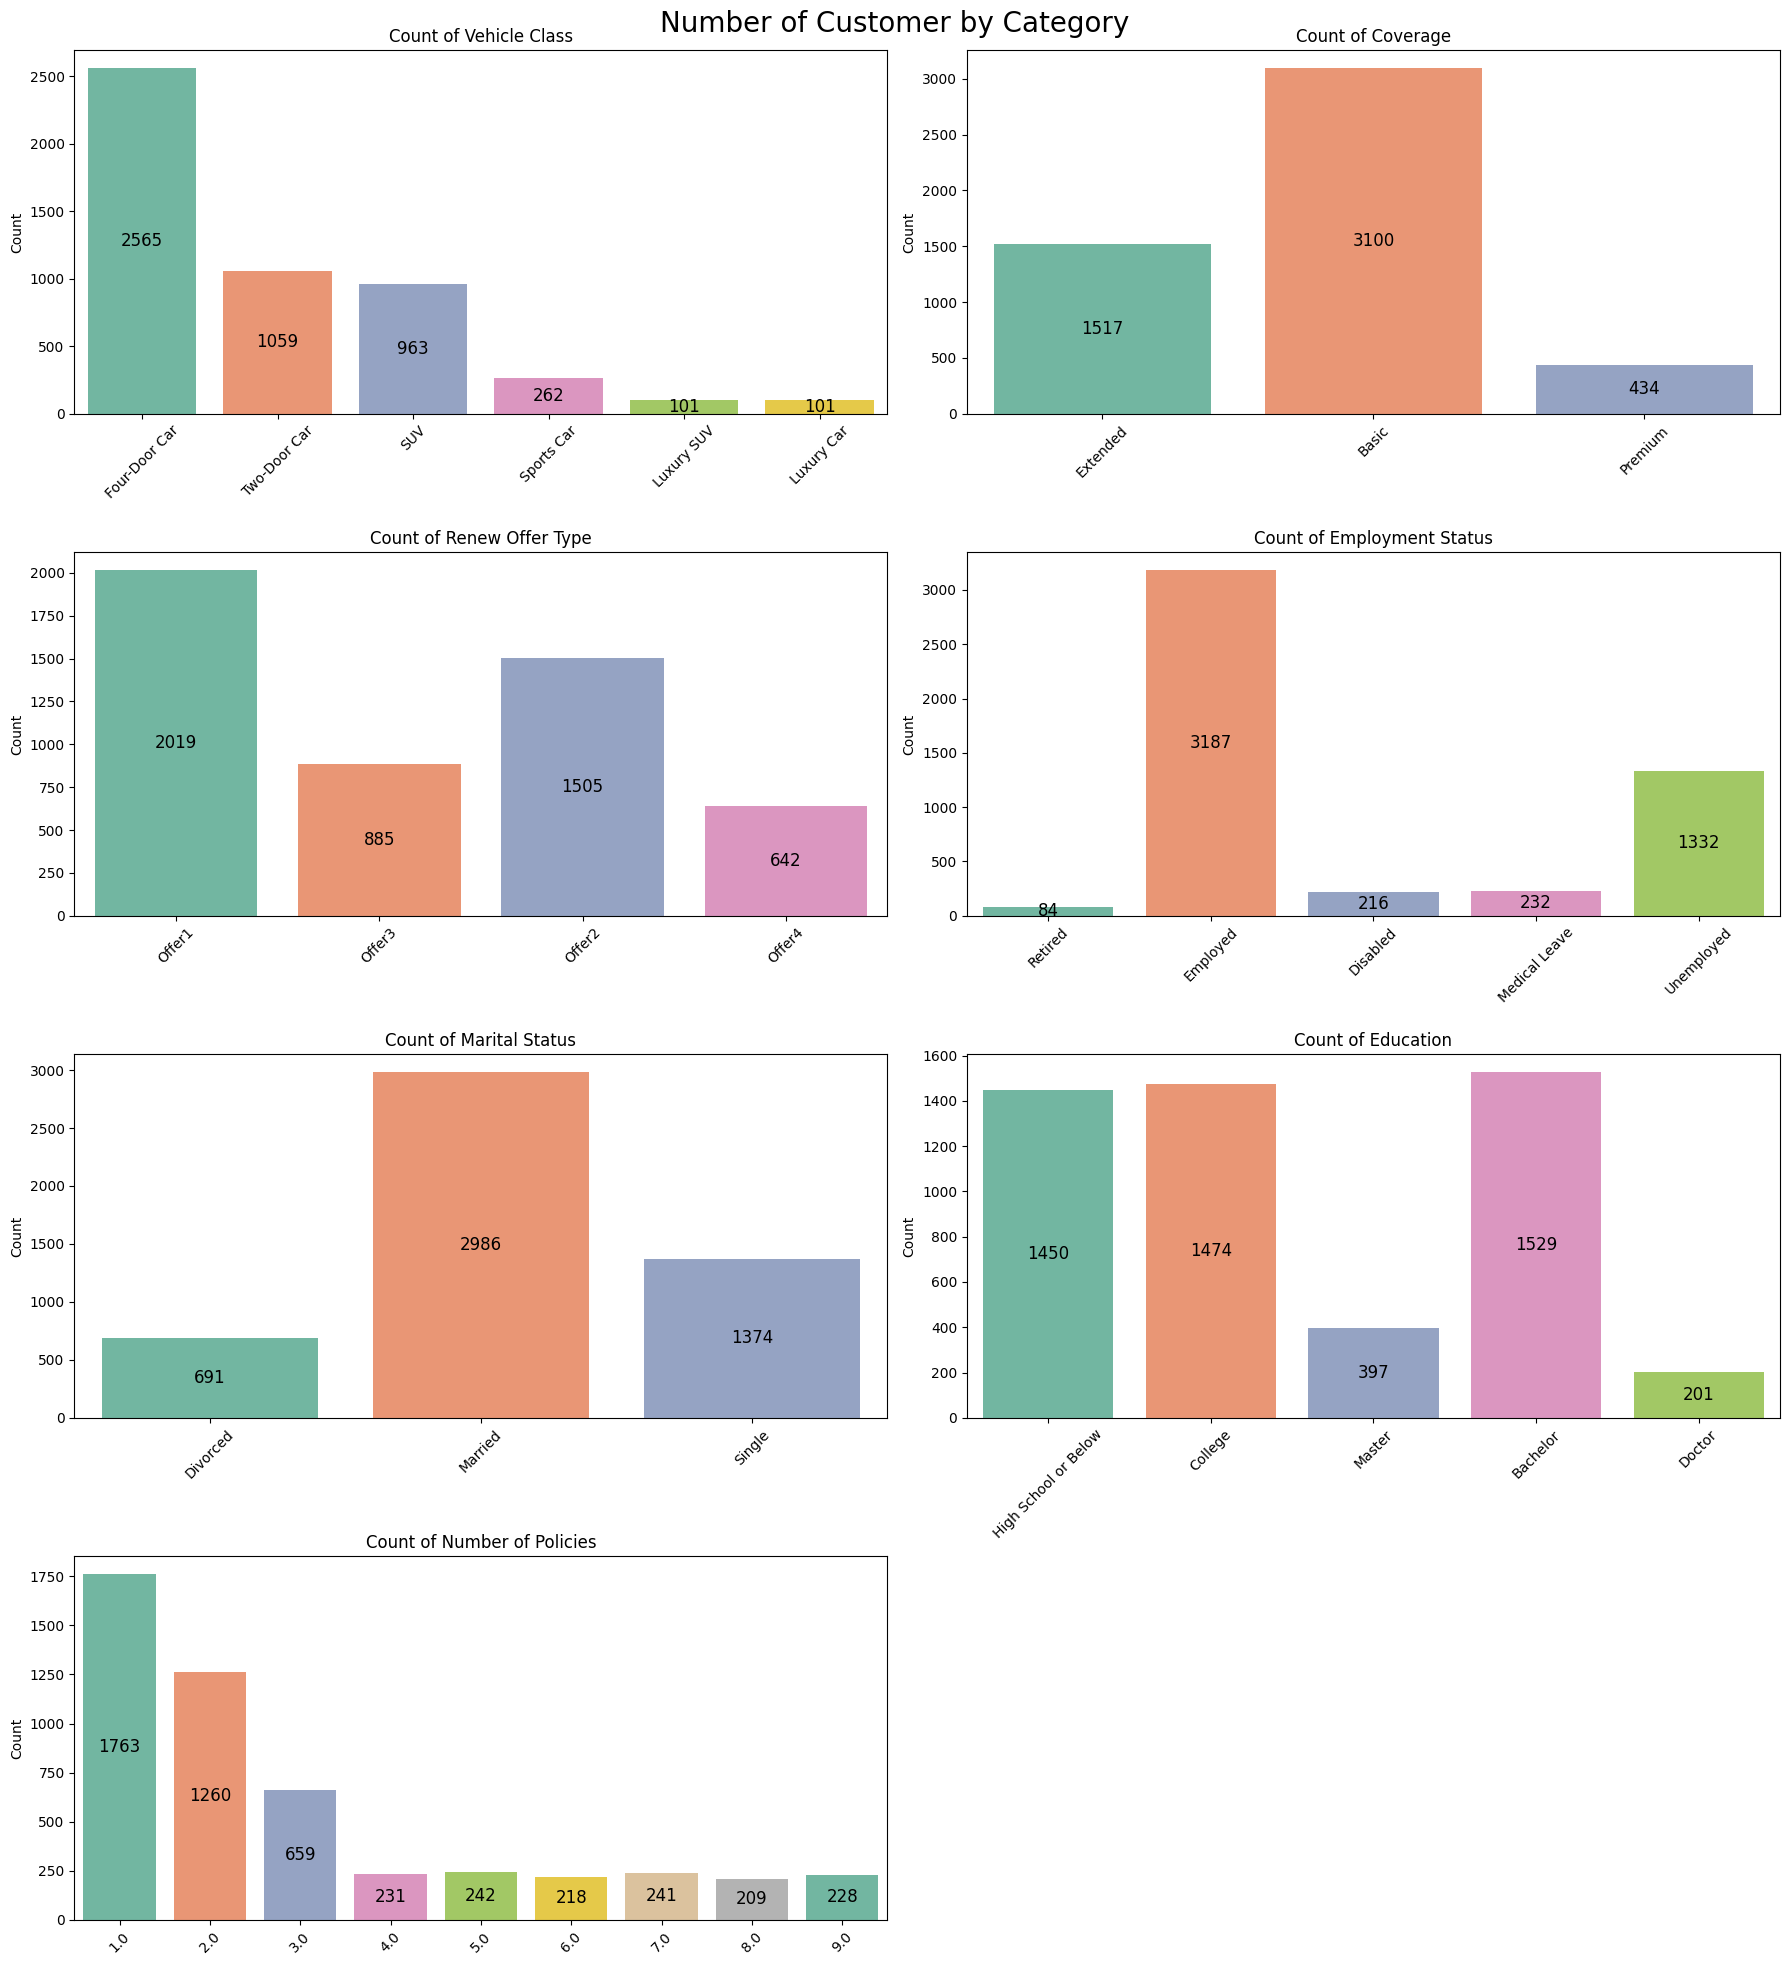

In [213]:
fig, axs = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Number of Customer by Category",size = 20)

for i, col in enumerate(category):
    sns.countplot(x=df_clv[col], ax=axs[i//2, i%2], palette='Set2')
    axs[i//2, i%2].set_title(f'Count of {col}')
    axs[i//2, i%2].set_xlabel('')
    axs[i//2, i%2].set_ylabel('Count')
    axs[i//2, i%2].tick_params(axis='x', rotation=45)

    for p in axs[i//2, i%2].patches:
        height = p.get_height()
        axs[i//2, i%2].annotate(f'{int(height)}', 
                                 (p.get_x() + p.get_width() / 2., height / 2), 
                                 ha = 'center', va = 'center', 
                                 fontsize=12, color='black')
    
if len(category) % 2 != 0:
    fig.delaxes(axs[3, 1])

plt.tight_layout()
plt.show()

* Dapat dilihat bahwa jumlah kendaraan bertipe 4 pintu mendominasi tipe kendaraan para customer (2565 customer), dua kali lipat dari jumlah kendaraan bertipe lainnya. Hal dapat disebabkan karena kebanyakan kendaraan yang dijual di masyarakat adalah kendaraan dengan 4 pintu. Sementara itu, mobil 2 pintu dan SUV mengikuti dengan jumlah masing masing 1059 dan 963 customer. Kategori mobil mewah dan sport tidak banyak menyumbang customer, mungkin dikarenakan mobil-mobil tersebut langka masyarakat.
* Pengguna mayoritas memilih coverege basic (3100 customer). Diikuti oleh extended dan premium. Hal ini mungkin saja terjadi dikarenakan kebanyakan pelanggan  merupakan pengguna mobil biasa (4 pintu, 2 pintu, dan SUV). Pelanggan mungkin cenderung memilih coverage yang murah.
* Penawaran pembaharuaan 1 paling tinggi dengan 2019 customer, diikuti oleh penewaran pembaharuan 2, 3, dan 4 dengan jumlah masing masing 1505, 885, dan 642 customer.
* Mayoritas pelanggan bekerja, sebanyak 3187 customer. Hal ini terjadi mungkin karena orang yang bekerja memiliki penghasilan untuk memiliki mobil.
* Kebanyakan pelanggan sudah menikah, mengindikasikan bahwa keluarga mungkin menjadi segmen pasar penting (2986 customer).
* Pelanggan dengan pendidikan "College" paling banyak, menunjukkan bahwa edukasi mungkin memengaruhi keputusan pembelian asuransi.


In [214]:
df_clv.groupby("Vehicle Class")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Vehicle Class,,
Four-Door Car,72.0,5324.387860
Luxury Car,193.0,14510.443760
Luxury SUV,199.0,15167.044020
SUV,116.0,8613.464001
Sports Car,116.0,8774.738289
Two-Door Car,71.0,5225.031430


Tipe kendaraan mewah, luxury car & luxury SUV, memiliki median nilai CLV lebih tinggi dari tipe lainnya, sekitar `14.500`, Diikuti SUV dan Sport car, sekitar `8.600`. Mobil dengan 4 pintu atau 2 pintu memiliki median sekitar `5.000`.

In [215]:
df_clv.groupby('Coverage')[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Coverage,,
Basic,70.0,5282.937237
Extended,92.0,6727.617003
Premium,114.0,8688.813000


Basic Coverage mimiliki median CLV sebesar 5.282 dibawah extend dan premium masing - masing sebesar 6.727 dan 8.688. Jadi mungkin terjadi karena premi yang dibayarkan pada masing - masing tipe coverage berbeda dengan basic paling rendah dan premium paling tinggi.

In [216]:
df_clv.groupby('Renew Offer Type')[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Renew Offer Type,,
Offer1,90.0,6832.111972
Offer2,78.0,5416.413581
Offer3,79.0,5757.489397
Offer4,74.0,5222.656199


Tipe penawaran pembaruhan memberikan median nilai yang cukup beragam. Dapat diliaht Offer 1 memiliki nilai yang lebih tinggi dari tipe yang lainnya.

### **2.2.4 Numerical Features**

In [217]:
df_clv[numerik].describe()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,92.911107,429.798954,37739.838448,8059.483178
std,34.335010,293.129102,30691.452111,6989.189674
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.776304,0.000000,3964.441004
50%,82.000000,374.400000,34322.000000,5837.528088
75%,109.000000,548.123122,62471.500000,9028.564632
max,297.000000,2759.794354,99934.000000,83325.381190


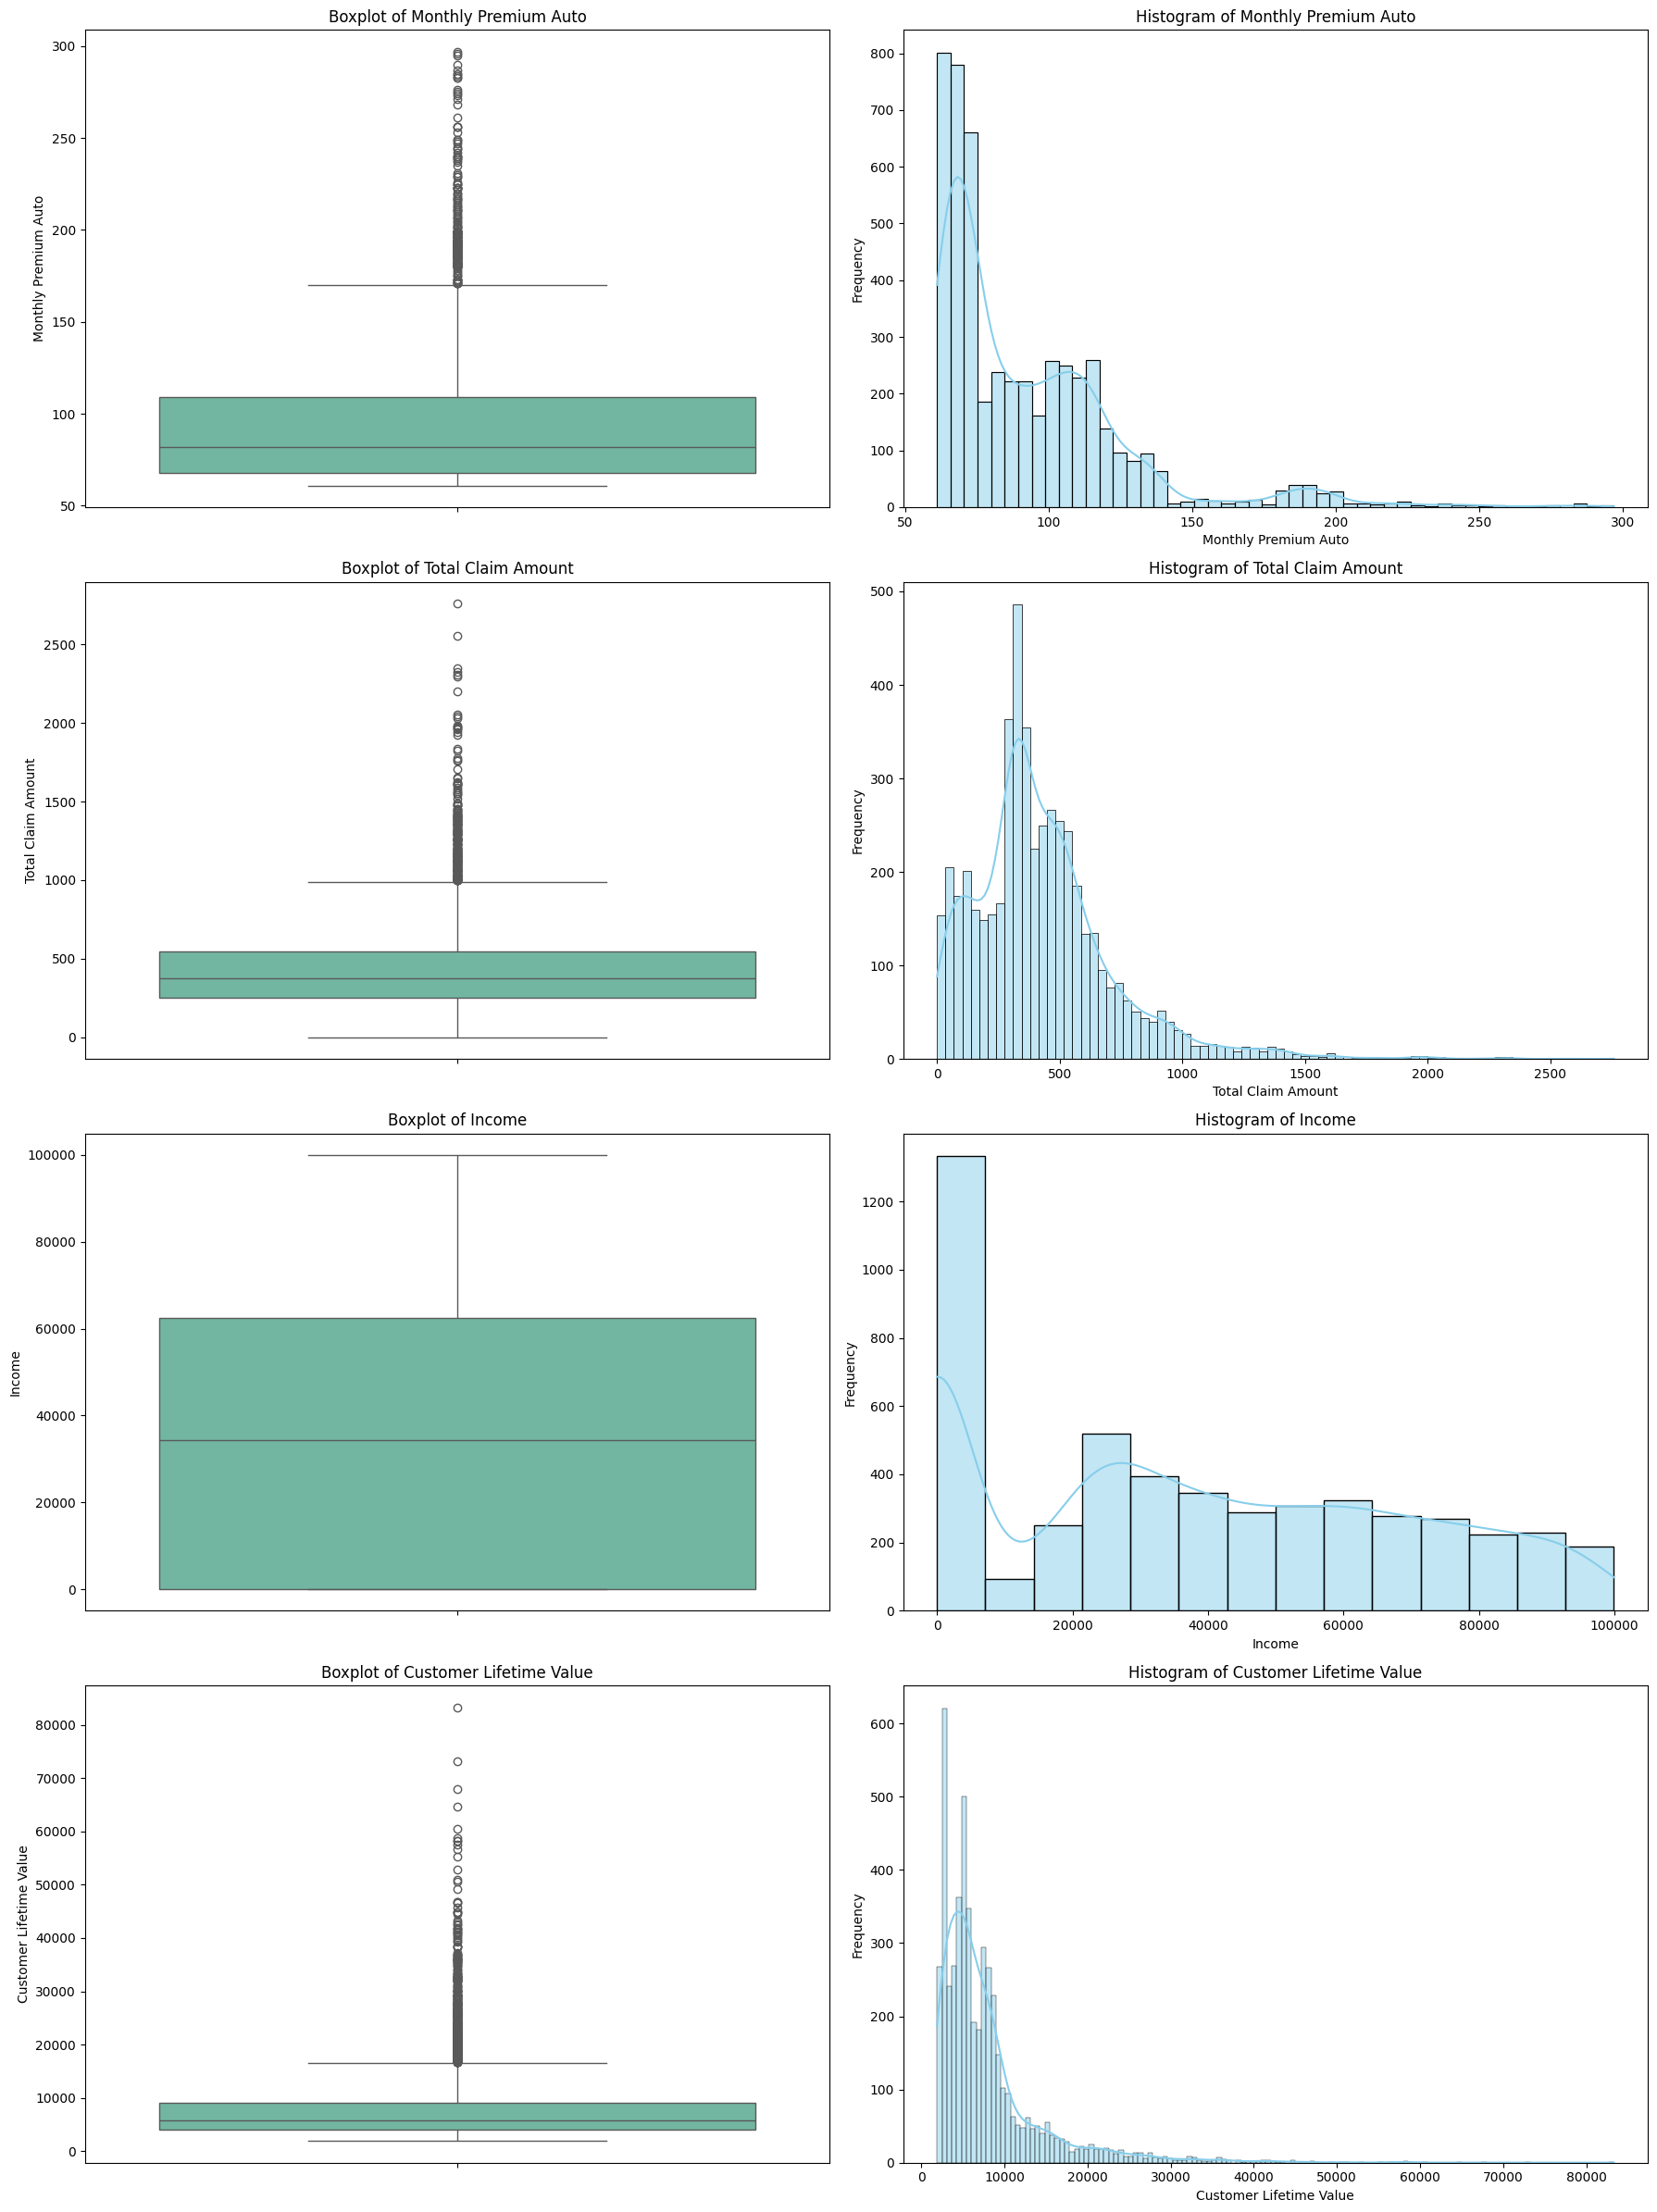

In [218]:
fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# Membuat boxplot dan histogram untuk setiap variabel numerik
for i, col in enumerate(numerik):
    sns.boxplot(y=df_clv[col], ax=axes[i, 0], palette='Set2')
    axes[i, 0].set_title(f'Boxplot of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel(col)
    
    sns.histplot(df_clv[col], kde=True, ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'Histogram of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- Menunjukkan bahwa terdapat banyak outliers di bagian atas distribusi premi bulanan, di mana sebagian besar data berada di kisaran 50-150. Outlier menunjukkan premi yang sangat tinggi (mencapai hampir 300).
- Distribusi Monthly Premium Auto sangat right-skewed, dengan sebagian besar pelanggan membayar premi bulanan sekitar 50-100. Sangat sedikit pelanggan yang membayar premi lebih tinggi di atas 200.
- Mayoritas pelanggan membayar premi bulanan yang relatif rendah. Outlier ini mungkin menunjukkan pelanggan yang memiliki polis dengan cakupan lebih besar atau perlindungan tambahan, dan ini perlu dianalisis lebih lanjut.
- Ada banyak outliers pada bagian atas distribusi jumlah klaim, dengan mayoritas klaim berada di bawah 1000. Namun, beberapa klaim bahkan mencapai di atas 2500.
- Distribusi jumlah klaim juga menunjukkan pola right-skewed. Sebagian besar pelanggan mengajukan klaim di bawah 500, dan sangat sedikit yang mengajukan klaim dalam jumlah sangat besar.
- Data pendapatan memiliki distribusi yang lebih seimbang dengan rentang sekitar 0 hingga 100.000, dengan median sekitar 40.000. Tidak ada outlier yang signifikan pada pendapatan.
- Distribusi pendapatan terlihat sedikit right-skewed, tetapi lebih terdistribusi dibandingkan variabel lainnya. Sebagian besar pelanggan memiliki pendapatan di bawah 50.000, namun masih ada sejumlah pelanggan dengan pendapatan di atas angka tersebut.
- Terdapat banyak outliers pada distribusi CLV, di mana mayoritas CLV berada di bawah 10.000, tetapi beberapa pelanggan memiliki CLV hingga 80.000 atau lebih.
- Distribusi CLV sangat right-skewed, dengan sebagian besar pelanggan memiliki CLV yang relatif rendah (di bawah 10.000), tetapi ada beberapa pelanggan dengan CLV yang sangat tinggi.

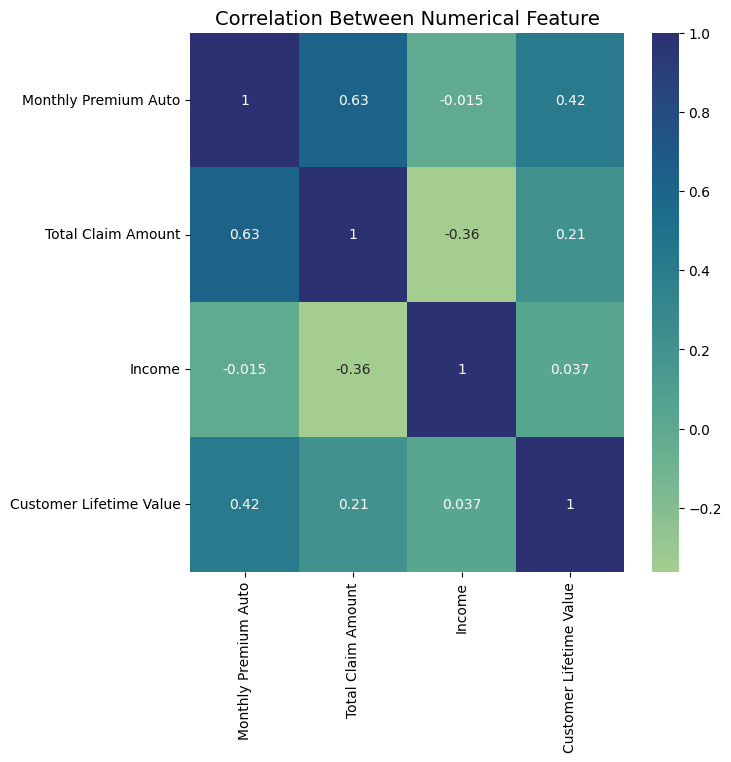

In [219]:
plt.figure(figsize=(7, 7), facecolor = "none")
sns.heatmap(df_clv[numerik].corr(), annot = True, cmap = "crest")

plt.title("Correlation Between Numerical Feature", size = 14)
plt.show()

* Variabel Monthly Premium Auto tidak terdistribusi normal. Nilai median dari variabel premi bulanan adalah 82 Dollar dengan nilai maksimum dan minimum masing-masing sebesar 61 Dollar dan 297 Dollar.
* Variabel Total Claim Amount juga tidak terdistribusi normal. Nilai median dari variabel ini adalah 374.4 Dollar dengan nilai maksimum dan minimum masing-masing sebesar 0.423310 Dollar dan 2759.794354 Dollar.
* Variabel Income, sama seperti Monthly Premium Auto dan Total Claim Amount, juga tidak terdistribusi normal. Nilai median variabel pemasukan customer memiliki nilai sebesar 34322 Dollar dengan nilai maksimum dan minimum 0 Dollar dan 99934 Dollar.
* Terdapat korelasi positif yang kuat antara dua variabel (nilai korelasi 0.63). Ini menunjukkan bahwa ketika salah satu variabel meningkat, variabel lainnya cenderung meningkat juga. Hubungan ini signifikan dan perlu diperhatikan dalam analisis lebih lanjut.
* Ada juga korelasi negatif yang lemah (nilai korelasi -0.36) antara dua variabel, menunjukkan bahwa ketika satu variabel meningkat, yang lainnya cenderung menurun. Namun, korelasi ini tidak terlalu kuat, jadi pengaruhnya mungkin tidak terlalu signifikan.
* Beberapa pasangan variabel memiliki korelasi yang sangat rendah (misalnya -0.015), menunjukkan hampir tidak ada hubungan linier antara variabel-variabel tersebut. Ini berarti perubahan dalam satu variabel tidak dapat digunakan untuk memprediksi perubahan dalam variabel lainnya dengan baik.



### **2.2.5 Outliers**

In [220]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')    

In [222]:
find_anomalies(df_clv["Monthly Premium Auto"])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


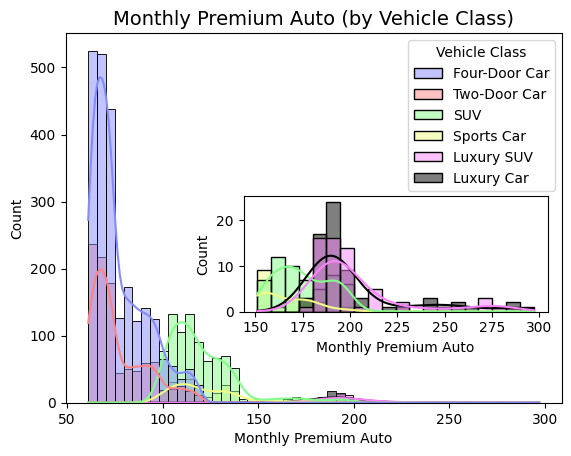

In [256]:
# Mothly Premium Auto
fig, ax1 = plt.subplots(facecolor = "none")

left, bottom, width, height = [0.403, 0.3, 0.475, 0.24]
ax2 = fig.add_axes([left, bottom, width, height])

sns.histplot(data = clv, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = True, palette = ["#848BFC", "#FC8484", "#84FC89", "#F1FC84", "#F884FC", "black"], ax = ax1)
sns.histplot(data = clv[clv["Monthly Premium Auto"] > 150], bins = 20, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = True, palette = ["#F884FC", "black", "#84FC89", "#F1FC84"], ax = ax2)
ax2.get_legend().remove()

ax1.set_title("Monthly Premium Auto (by Vehicle Class)", size = 14)
plt.show()

Menghapus outlier pada variabel Monthly Premium Auto dengan batas atas 170.5 Dollar tidak bijaksana, karena akan menghilangkan dua kelas penting pada variabel Vehicle Class: Luxury Car dan Luxury SUV. Oleh karena itu, penghapusan outlier pada variabel ini tidak akan dilakukan.

In [224]:
find_anomalies(df_clv["Total Claim Amount"])

IQR: 296.34681750000004
limit_bawah: -192.74392225000005
limit_atas: 992.6433477500001


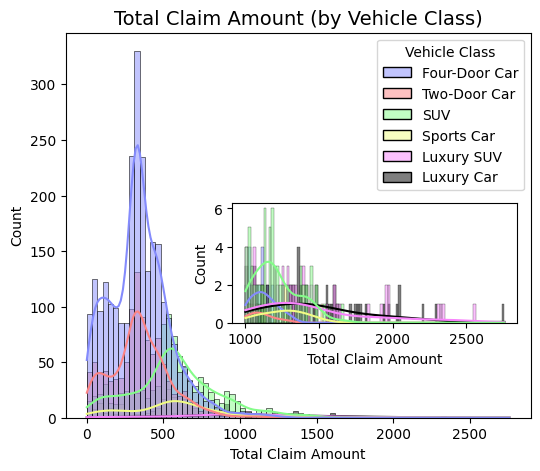

In [257]:
# Total Claim Amount
fig, ax1 = plt.subplots(figsize = (6,5), facecolor = "none")

left, bottom, width, height = [0.403, 0.3, 0.475, 0.24]
ax2 = fig.add_axes([left, bottom, width, height])

sns.histplot(data = df_clv, x = "Total Claim Amount", hue = "Vehicle Class", kde = True, palette = ["#848BFC", "#FC8484", "#84FC89", "#F1FC84", "#F884FC", "black"], ax = ax1)
sns.histplot(data = df_clv[df_clv["Total Claim Amount"] > 1000], bins = 100, x = "Total Claim Amount", hue = "Vehicle Class", kde = True, palette = ["#84FC89", "#F884FC", "black", "#F1FC84", "#848BFC", "#FC8484"], ax = ax2)
ax2.get_legend().remove()

ax1.set_title("Total Claim Amount (by Vehicle Class)", size = 14)
plt.show()

In [225]:
df_clv.groupby("Vehicle Class")['Total Claim Amount'].describe().sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,346.106756,198.864261,0.423310,208.885686,336.000000,454.358500,1310.461580
Two-Door Car,1059.0,347.867548,193.766877,1.332349,230.655925,336.000000,456.488343,1261.943541
SUV,963.0,573.174610,289.953148,0.517753,412.467956,556.800000,734.400000,1654.202174
Sports Car,262.0,550.563401,299.232668,5.573179,343.433805,556.800000,706.592595,1516.383753
Luxury SUV,101.0,1059.876385,518.991688,1.587888,825.657746,998.400000,1328.839129,2552.343856
Luxury Car,101.0,1103.927488,518.906203,32.874675,873.600000,1008.569798,1396.702365,2759.794354


In [226]:
find_anomalies(df_clv["Customer Lifetime Value"])

IQR: 5064.1236284999995
limit_bawah: -3631.744438749999
limit_atas: 16624.75007525


Menghapus outlier pada variabel Total Claim Amount dengan batas atas 992.64 Dollar tidak menyebabkan hilangnya kelas kategorik. Namun, lebih dari setengah data pada kelas Luxury Car dan Luxury SUV akan terhapus karena nilai median klaimnya di atas batas tersebut. Oleh karena itu, penghapusan outlier sebaiknya dihindari, kecuali jika model yang dihasilkan kurang memuaskan.

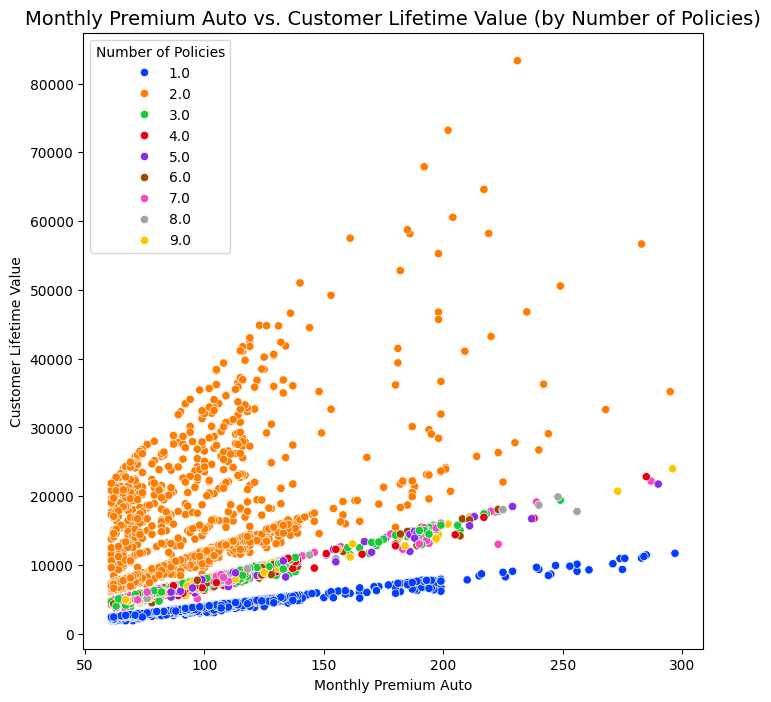

In [227]:
# Customer lifetime Value
plt.figure(figsize = (8,8), facecolor = "none")
sns.scatterplot(data = df_clv, 
                y = "Customer Lifetime Value", x = "Monthly Premium Auto", 
                hue = "Number of Policies",
                palette = "bright")

plt.title("Monthly Premium Auto vs. Customer Lifetime Value (by Number of Policies)", size = 14)
plt.show()

- Korelasi Positif Antara Premi Bulanan dan CLV: Terlihat bahwa semakin tinggi premi bulanan (Monthly Premium Auto), cenderung semakin tinggi pula Customer Lifetime Value (CLV). Hal ini menunjukkan bahwa pelanggan yang membayar premi lebih tinggi berpotensi memberikan nilai seumur hidup yang lebih besar bagi perusahaan.
- Pengaruh Jumlah Polis: Pelanggan dengan jumlah polis yang lebih banyak (seperti yang ditunjukkan dengan warna oranye untuk 2 polis) memiliki CLV yang lebih tinggi secara konsisten, meskipun premi bulanan mereka mungkin tidak jauh berbeda dari pelanggan dengan lebih sedikit polis.
- Penyebaran CLV untuk Pelanggan dengan Banyak Polis:Pelanggan dengan lebih dari 5 polis (dilambangkan dengan berbagai warna seperti ungu, abu-abu, dan lain-lain) cenderung memiliki premi bulanan yang lebih tinggi, tetapi CLV mereka lebih bervariasi, termasuk beberapa di antaranya yang mencapai CLV sangat tinggi (di atas 80.000).

In [228]:
q1 = df_clv['Customer Lifetime Value'].quantile(0.25)
q3 = df_clv['Customer Lifetime Value'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5


limit_bawah = q1 - limit
limit_atas = q3 + limit

In [229]:
df_clv[df_clv['Customer Lifetime Value'] > limit_atas]['Customer Lifetime Value'].count()

449

**Terdapat 449 outliers pada kolom Customer Lifetime Value.**

In [230]:
clv = df_clv[df_clv['Customer Lifetime Value'] <= limit_atas].copy()

In [231]:

feature = []
n_data = []
n_feature = []
s_feature = []

for i in clv.columns:
    feature.append(i)
    n_data.append(clv[i].count())
    n_feature.append(clv[i].nunique())
    s_feature.append(list(clv[i].unique())[:9])

pd.set_option("display.max_colwidth", None)  
pd.DataFrame({"Number of Datas" : n_data, "Number of Types" : n_feature, "Samples of Types" : s_feature}, index = df_clv.columns)

,Number of Datas,Number of Types,Samples of Types
Vehicle Class,4602,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
Coverage,4602,3,"[Extended, Basic, Premium]"
Renew Offer Type,4602,4,"[Offer1, Offer3, Offer2, Offer4]"
Employment Status,4602,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
Marital Status,4602,3,"[Divorced, Married, Single]"
Education,4602,5,"[High School or Below, College, Master, Bachelor, Doctor]"
Number of Policies,4602,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,4602,160,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0]"
Total Claim Amount,4602,2979,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772]"
Income,4602,3309,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0]"


**Tidak berkurang pada variable kategorik setelah data outliers pada variabel dihapus.**

## **3. Modeling**

In [232]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split

### **3.1 Data Spliting**

Data set akan dibagi menjadi dua bagian, yaitu data train dan data set. Data train adalah data yang nantinya digunakan untuk melatih model machine learning. Data test digunakan untuk menguji apakah model yang sudah dibuat mampu memberikan nilai prediksi yang memuaskan. Perbandingan jumlah data train dan data test adalah 70% berbanding 30%.

In [233]:
# Memisahkan data independen variabel dengan target
X = clv.drop('Customer Lifetime Value', axis=1) # Feature
y = clv['Customer Lifetime Value']              # Target 


**Train dan Test Spliting**

In [234]:
# Memisahkan antara train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.3,
                 random_state=2020) 

## **3.2 Data Preprocessing**

Dataset untuk latihan model machine learning perlu ditransformasi karena model hanya menerima data numerik. Untuk fitur nominal seperti Vehicle Class, Employment Status, dan Marital Status, akan diterapkan one-hot encoding (binary encoding tidak digunakan karena jumlah kelas sedikit). Sedangkan fitur Coverage, Renew Offer Type, dan Education akan di-encode menggunakan ordinal encoding karena fitur-fitur tersebut memiliki peringkat.

In [235]:
# import library modeling

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [236]:
# Mapping digunakan untuk ordinal encoder
coverage_map = [{"col" : "Coverage",
                   "mapping" : {None : 0, "Basic" : 1,"Extended" : 2, "Premium" : 3}}]
rot_map = [{"col" : "Renew Offer Type",
                "mapping" : {None : 0, "Offer1" : 1,"Offer2" : 2, "Offer3" : 3, "Offer4" : 4}}]
education_map = [{"col" : "Education",
                      "mapping" : {None : 0, "High School or Below" : 1,"College" : 2, "Bachelor" : 3, "Master" : 4, "Doctor" : 5}}]


transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop = "first"), ["Vehicle Class", "Employment Status", "Marital Status"]),# Onehot encoder untuk data nominal
    ("coverage_ordinal", ce.OrdinalEncoder(mapping = coverage_map), ["Coverage"]),                      # Ordinal encoder untuk data ordinal
    ("rot_ordinal", ce.OrdinalEncoder(mapping = rot_map), ["Renew Offer Type"]),                        # Ordinal encoder untuk data ordinal
    ("education_ordinal", ce.OrdinalEncoder(mapping = education_map), ["Education"])                    # Ordinal encoder untuk data ordinal
], remainder = "passthrough")
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Employment Status',
                                  'Marital Status']),
                                ('coverage_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                 ['Coverage']),
                                ('rot_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Renew Offer '
                                                                 'Type',
                                                          'data_type': dtype('O'),
                                                          'mapping': None      0
Offer1    1
Offer2    2
Offer3    3
Offer4    4
dtype: int64}]),
                                 ['Renew Offer Type']),
                                ('education_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                 ['Education'])])

In [237]:
clv.head(1)

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.48688


In [238]:
# transformer.fit_transform(X) # Uji apakah transformer bisa dijalankan

In [239]:
# pd.DataFrame(transformer.fit_transform(X))

## **3.3. Bechmark Model**

Agar dapat melakukan bencmark model, model akan melakukan cross validasi pada data train. Cross validation dilakukan dengan membagi data train beberapa bagian, model data set ini adalah 5. Empat data diambil untuk train menggunakan model lalu hasilnya dihitung menggunakan sisannya disebut data validasi. Pengulang dilakukan sehingga semua bagian data pernah menjadi data validasi. Nilai rata-ratanya dan standar deviasi akan dihitung untuk menentukan apakah model sudah cocok dengan dataset.

In [264]:
# Import library untuk modeling

from sklearn.model_selection import  cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error



**Choose a Benchmark Model**

In [258]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = ()
dt = DecisionTreeRegressor(max_depth= 3 , random_state= 2020) # Parameter max_depth digunakan untuk membatasi kedalaman pohon ggar tidak overfiting
rf = RandomForestRegressor(max_depth= 3 , random_state= 2020)
xgb = XGBRegressor(max_depth = 3 , random_state= 2020)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr, knn , dt , rf , xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020)
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-2947.55857302 -2772.24269749 -2518.34097279 -2863.74744362
 -2707.02683554] LinearRegression()
[-2177.80204332 -2111.28010054 -1943.66530799 -2129.51564417
 -2009.08474198] LinearRegression()
[-0.37412726 -0.39852452 -0.37670555 -0.37151813 -0.37100579] LinearRegression()
[-3489.24519845 -3381.5185777  -3211.64378623 -3544.82819754
 -3297.41109011] KNeighborsRegressor()
[-2652.54703933 -2665.55051021 -2489.09636665 -2767.2244883
 -2469.1382758 ] KNeighborsRegressor()
[-0.4929349  -0.54216245 -0.49928203 -0.51566206 -0.47169854] KNeighborsRegressor()
[-1474.62786993 -1297.92004764 -1310.97804394 -1573.857736
 -1348.65478405] DecisionTreeRegressor(max_depth=3, random_state=2020)
[-892.04588291 -832.06143598 -826.81410019 -936.01345079 -845.11078337] DecisionTreeRegressor(max_depth=3, random_state=2020)
[-0.12055295 -0.12146674 -0.119633   -0.12360297 -0.11967614] DecisionTreeRegressor(max_depth=3, random_state=2020)
[-1395.97266451 -1189.3113793  -1237.36415527 -1459.39900185
 -1287.24

In [242]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-2761.783304,146.479333,-2074.269568,85.378471,-0.378376,0.010278
1,KNN Regressor,-2819.597643,113.639497,-1970.002811,67.354745,-0.365088,0.008316
2,DecisionTree Regressor,-1401.207696,106.555239,-866.409131,41.720869,-0.120986,0.001471
3,RandomForest Regressor,-1313.830396,100.017565,-767.021449,34.159703,-0.105871,0.002418
4,XGBoost Regressor,-945.207757,96.122575,-465.726698,21.648920,-0.069637,0.002916


Dapat dilihat, model XG-Boost memberikan nilai rata-rata RMSE, MAE, dan MAPE yang paling rendah dari semua model. Oleh karena itu, model yang terpilih sebagai model prediksi adalah XG-Boost.

### **Predict with Test Set**

Prediksi pada test set dengan menggunakan model XGBoost.

In [259]:
models = {'XGB': XGBRegressor(max_depth = 3 , random_state=2020)}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:
    
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,958.424204,469.338652,0.071086


Dari hasil prediksi menggunakan data test, didapatkan nilai RMSE sebesar 958.424204 Dollar, sedangkan untuk nilai MAPE didaptakan sebesar 7.1%. Hasil yang cukup memuaskan, akan tetapi ada potensi hasil menjadi lebih baik ketika menggunakan Hyperparamater Tuning.

## **3.4 Hyperparameter Tuning**

In [260]:
# Gunakan fungsi get_params untuk melihat parameter yang bisa di tuning.
estimator.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['Vehicle Class', 'Employment Status',
                                     'Marital Status']),
                                   ('coverage_ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                             'data_type': dtype('O'),
                                                             'mapping': None        0
   Basic       1
   Extended    2
   Premium     3
   dtype: int64}]),
                                    ['Coverage']),
                                   ('rot_ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'Renew Offer '
                                                                    'Type',
                                                             

Paramater yang dapat diatur pada model XG-Boost pada saat melakukan Hyperparameter Tuning. Parameter tersebut diantaranya adalah :

|Parameter|Fungsi|
|--|--|
|learning_rate|Besarnya beban yang ditambahkan setiap pohon keputusan baru dibuat|
|n_estimators|Banyak pohon yang akan dibuat|
|max_depth|Nilai maksimum kedalam pohon keputusan|
|gamma|min impurity decrease, semakin besar nilainya, semakin konservatif/simpel modelnya|

In [261]:
# Memasukan parameter-parameter yang digunakan untuk Hyperparameter Tuning
hyperparam_space_xgb = [
    {"model__learning_rate" : [1, 0.1, 0.05, 0.005],
     "model__n_estimators" : [20,200,400,4000],
     "model__max_depth" : [3,4,5,6],
     "model__gamma" : [0,1,2,3]}
]

In [246]:
# Membuat grid search untuk mendapatkan nilai error paling rendah
grid = GridSearchCV(estimator,
                    param_grid = hyperparam_space_xgb,
                    cv = crossval,
                    scoring = "neg_root_mean_squared_error",
                    n_jobs = -1)

In [262]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'map...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=2020, ...))]),
             n_jobs=-1,
             param_grid=[{'model__gamma': [0, 1, 2, 3],
                          'model__learning_rate': [1, 0.1, 0.05, 0.005],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__n_estimators': [20, 200, 400, 4000]}],
             scoring='neg_root_mean_squared_error')

In [275]:
pd.DataFrame(grid.cv_results_)[["params", "mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]].sort_values("rank_test_score").head()

,params,mean_fit_time,mean_test_score,std_test_score,rank_test_score
165,"{'model__gamma': 2, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.566067,-908.133741,108.991165,1
101,"{'model__gamma': 1, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.490774,-908.133741,108.991165,1
37,"{'model__gamma': 0, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.659830,-908.133741,108.991165,1
229,"{'model__gamma': 3, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.460149,-908.133741,108.991165,1
97,"{'model__gamma': 1, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200}",0.387082,-917.155198,99.988085,5


In [276]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', grid.best_score_)
print('Best_params:', grid.best_params_)

XGBoost
Best_score: -908.1337405922905
Best_params: {'model__gamma': 0, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}


Dari hasil hyperparameter tuning, kita mendapatkan hasil terbaik dari model XG_Boost dengan hasil sebagai berikut :
|Parametr|Nilai|
|--|--|
|learning_rate|0.05|
|n_estimator|200|
|max_depth|4|
|gamma|0|

In [277]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = grid.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,930.993614,393.043209,0.054105


## **3.5. Prediction with Tuned Model**

In [311]:
# Fit model yang sudah dilakukan hyperparameter tuning dengan keseluruhan data test untuk memprediksi data test
tuned_estimator = grid.best_estimator_
tuned_estimator.fit(X_train, y_train)
y_pred_tuned = tuned_estimator.predict(X_test)

In [292]:
# Sebelum hyperparameter tuning
score_before_tuning

,RMSE,MAE,MAPE
XGB,958.424204,469.338652,0.071086


In [279]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,930.993614,393.043209,0.054105


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 1060.90, 480.48,	0.071
- RMSE, MAE & MAPE setelah tuning: 930.99, 393.04, 0.054

## **3.6. Model Explanation**

In [322]:
# Mendapqtkan nama kolom dari tahapan preprocessing sebelumnya
features = (list(tuned_estimator[0].transformers_[0][1].get_feature_names_out()) +
            tuned_estimator[0].transformers_[1][2] +
            tuned_estimator[0].transformers_[2][2] +
            tuned_estimator[0].transformers_[3][2] +
            list(X_train.columns[tuned_estimator[0].transformers_[4][2]]))



<Figure size 800x800 with 0 Axes>

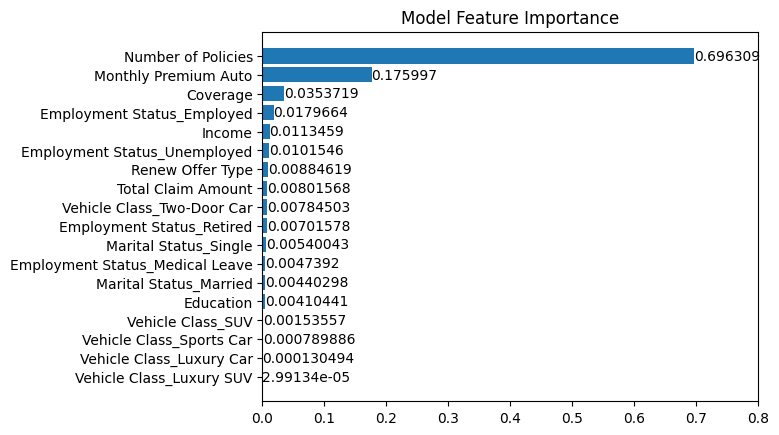

In [321]:
feature_importance = pd.DataFrame(
    {"Importances": tuned_estimator.named_steps['model'].feature_importances_}, 
    index=features
).sort_values("Importances")

# Plotting feature importance
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(facecolor="none")
bars = ax.barh(feature_importance.index, feature_importance["Importances"].values)
ax.set_xlim([0, 0.8])
ax.bar_label(bars)
plt.title("Model Feature Importance")
plt.show()

Dari barchart Model Feature Importance, fitur yang paling berpengaruh adalah Number of Policies, diikuti oleh Monthly Premium Auto dan Coverage di peringkat ketiga. Fitur lainnya juga berpengaruh, tetapi tidak sebesar ketiga fitur tersebut.

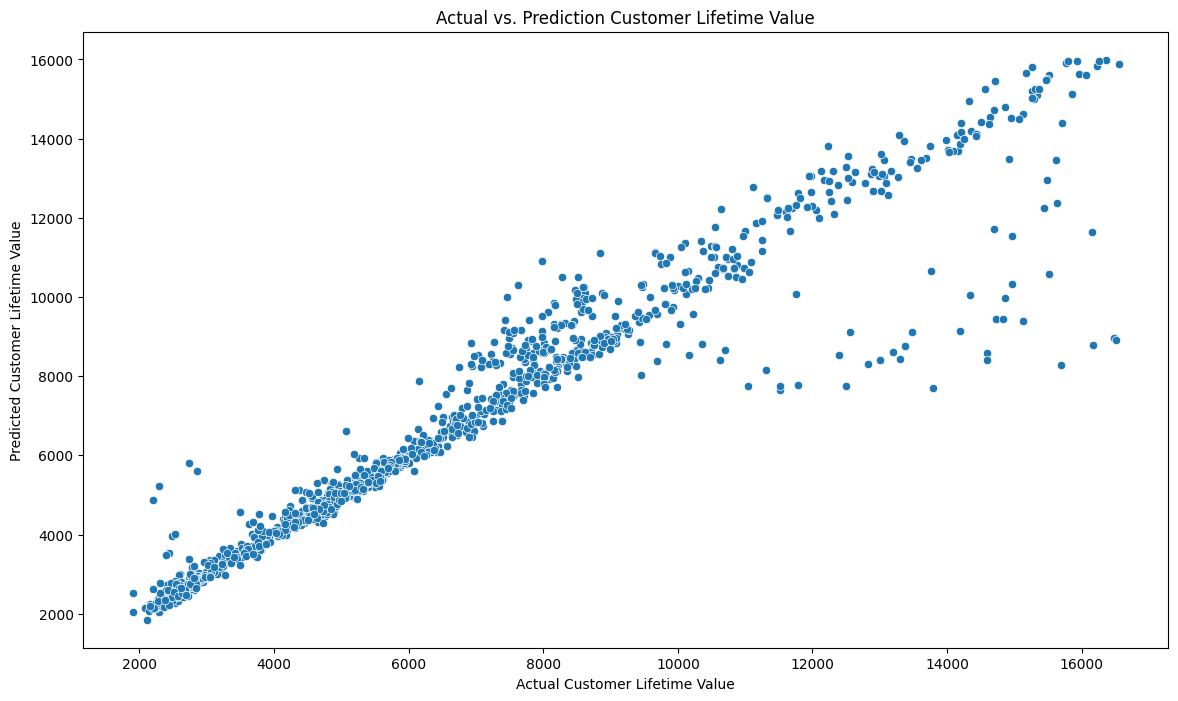

In [253]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Customer Lifetime Value', 
                                               xlabel="Actual Customer Lifetime Value", 
                                               ylabel="Predicted Customer Lifetime Value");


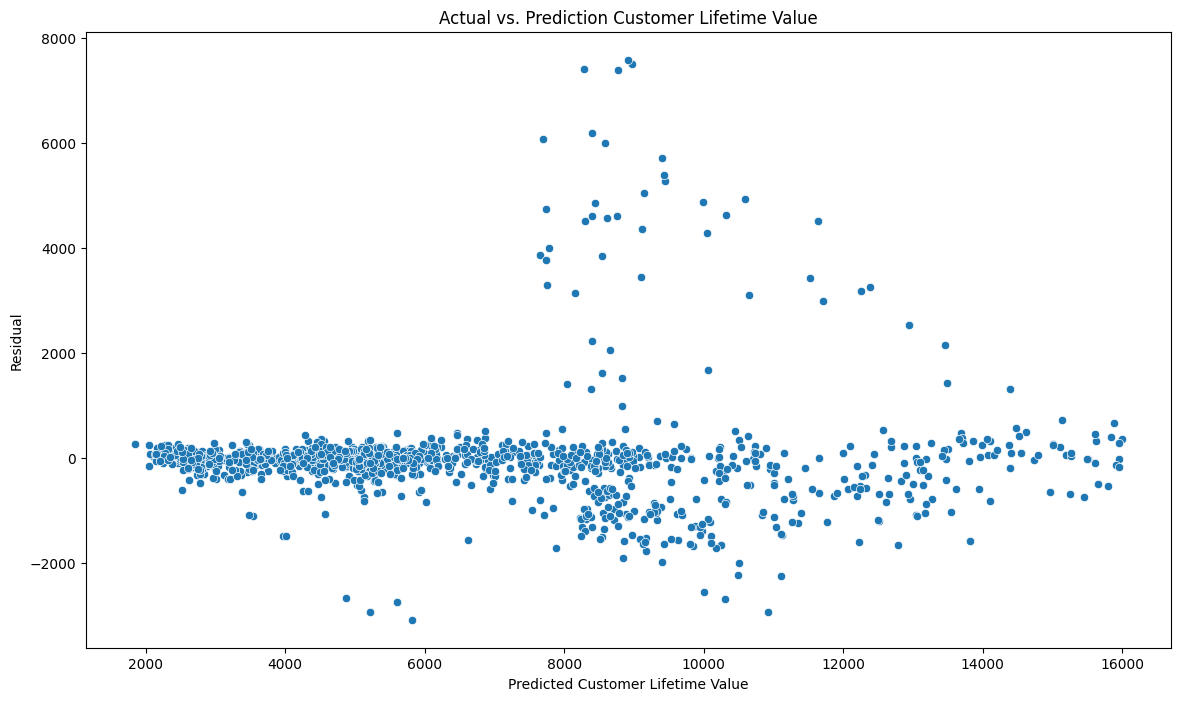

In [254]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_pred_xgb_tuning, y=y_test - y_pred_xgb_tuning).set(title='Actual vs. Prediction Customer Lifetime Value', 
                                               xlabel="Predicted Customer Lifetime Value", 
                                               ylabel="Residual");

Grafik Actual vs. Prediction menunjukkan bahwa model prediksi Customer Lifetime Value (CLV) bekerja dengan baik untuk nilai CLV yang rendah. Namun, untuk CLV tinggi (di atas 80,000), model kurang akurat, dengan beberapa data yang diprediksi hanya di kisaran 8,000-10,000, menunjukkan adanya bias. Residual yang tinggi sebagian besar terjadi pada undervalue, di mana prediksi lebih rendah dari nilai asli. Ini menandakan bahwa model cukup andal untuk mengidentifikasi pelanggan dengan CLV rendah, meskipun perlu perbaikan untuk prediksi CLV yang tinggi.

# **4. Conclusion & Recomendation**

## **4.1. Conclusion**


- Berdasarkan hasil evaluasi model XGBoost, didapatkan nilai RMSE sebesar 930.99 Dollar, MAE sebesar 393.04 Dollar, dan MAPE sebesar 5.41%. Ini berarti bahwa prediksi model memiliki kesalahan rata-rata sebesar 393.04 Dollar, dengan tingkat kesalahan relatif sekitar 5.41%. Meskipun terdapat beberapa variabilitas dalam prediksi, terutama untuk nilai yang lebih tinggi, model ini masih cukup akurat dan andal untuk memprediksi nilai Customer Lifetime Value (CLV), terutama pada nilai yang lebih rendah.

- Model ini dibatasi oleh rentang maksimum dan minimum dari data numerik serta kelas-kelas yang ada pada data kategorikal yang digunakan.

- Berdasarkan model yang dibangun, fitur yang paling memengaruhi besarnya Customer Lifetime Value (CLV) adalah Number of Policies, diikuti oleh Monthly Premium Auto, dan Coverage.

- Dari analisis eksplorasi data (EDA), ditemukan bahwa pelanggan dengan satu polis cenderung memiliki CLV yang rendah, sedangkan pelanggan dengan dua polis umumnya memiliki CLV yang lebih tinggi. Pelanggan dengan lebih dari dua polis memiliki CLV yang berada di antara keduanya.

- Selain itu, ditemukan bahwa CLV meningkat seiring kenaikan Monthly Premium Auto. Hal ini didukung oleh uji korelasi antara kedua variabel yang menunjukkan nilai korelasi sebesar 0.42, menandakan hubungan yang moderat.

- Terakhir, dari grafik median Customer Lifetime Value yang dipisahkan berdasarkan jenis Coverage, terlihat bahwa pelanggan dengan premium coverage cenderung memiliki CLV yang lebih tinggi, sedangkan pelanggan dengan basic coverage cenderung memiliki CLV yang lebih rendah.

## **4.2. Recomendation**

- Model ini lebih baik digunakan untuk mengidentifikasi pelanggan dengan Customer Lifetime Value (CLV) yang rendah, daripada untuk mencari pelanggan dengan CLV yang tinggi. Jika prediksi pelanggan dengan CLV tinggi diperlukan, harus diperhatikan bahwa beberapa data mungkin mengalami undervalue, sehingga mereka mungkin tidak masuk dalam prioritas pencarian.

- Jika prediksi model tidak memberikan hasil yang memuaskan saat deployment, beberapa teknik feature engineering bisa diterapkan, seperti binning pada data dengan banyak outlier. Ini dapat membantu menghindari penghapusan outlier yang berpotensi memengaruhi prediksi.

- Dari analisis EDA, diketahui bahwa pelanggan dengan dua polis cenderung memiliki CLV yang lebih tinggi dibandingkan dengan jumlah polis lainnya. Jika Anda memerlukan model yang lebih dapat diinterpretasikan, seperti regresi linear, one-hot encoding bisa diterapkan pada variabel ini untuk meningkatkan performa model.

- Saat dibandingkan dengan scatter plot, data sebelum dihapus menunjukkan adanya beberapa outlier kontekstual pada fitur Customer Lifetime Value, Monthly Premium Auto, dan Number of Policies. Outlier tersebut semuanya memiliki CLV yang jauh lebih tinggi daripada data pelanggan dengan dua polis. Tidak ada fitur dalam dataset yang dapat menjelaskan alasan terjadinya outlier ini. Oleh karena itu, disarankan untuk menambah fitur baru, seperti durasi pelanggan menjadi peserta asuransi atau frekuensi klaim yang diajukan pelanggan.

#### **Save Model**

In [323]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Customer Lifetime Value Estimator_XGB.sav', 'wb'))

In [324]:
# Load model
filename = 'Customer Lifetime Value Estimator_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [325]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

1060.902778315441